In [60]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pkg_resources

def replace_r_with_arbitrary(clean_donor: str):
        """
        Replace R group in the clean_min_acceptors.csv

        Args:
            clean_donor: path to processed acceptors

        Returns:
            SMILES column contains acceptors with replaced R groups
        """
        patts = {
            "[R1]": "CC(CCCCCC)CCCCCCCC",
            "[R2]": "CCCCCCCC",
            "[R3]": "[Si](CCC)(CCC)(CCC)",
            "[R4]": "CC(CC)CCCC",
            "[R5]": "SCCCCCCCCCCCC",
            "[R6]": "CC(CCCCCCCC)CCCCCCCCCC",
            "[R7]": "SCC(CCCCCC)CCCC",
            "[R8]": "[Si](CC)(CC)(CC)",
            "[R9]": "[Si](C(C)C)(C(C)C)C(C)C",
            "[R10]": "[Si](CCCC)(CCCC)(CCCC)",
            "[R11]": "[Si](C)(C)CCCCCCCC",
            "[R12]": "SCCCCC=C",
            "[R13]": "SCC4CCCCC4",
            "[R14]": "CCCCCC",
            "[R15]": "CCCCCCCCCC",
            "[R18]": "CCCCC",
            "[R19]": "CCCCCCCCCCCCCCCC",
            "[R20]": "CCCCCCCCCCC",
            "[R21]": "C(CCCCCCCCC)CCCCCCC",
            "[R23]": "CC(CCCCCCCCCCCC)CCCCCCCCCC",
            "[R24]": "COCCOC",
            "[R25]": "CC(CCCCCCCCCCC)CCCCCCCCC",
            "[R26]": "CCC",
            "[R27]": "CCCC",
            "[R28]": "CCC(CC)CCCC",
            "[R29]": "CCCC(CC)CCCC",
        }

        # New R group substitution pattern
        new_patts = {}
        atomic_num = 21
        for k, v in patts.items():
            # Only provides the transition metals and lanthanides
            # Outside of transition metals and lanthanides, valencies were weird, gave explicit Hs.
            if atomic_num == 31:
                atomic_num = 39
            elif atomic_num == 49:
                atomic_num = 57
            elif atomic_num == 81:
                atomic_num = 89
            mol = Chem.MolFromSmarts("[#{}]".format(atomic_num))
            smi = Chem.MolToSmiles(mol)
            new_patts[smi] = k
            atomic_num += 1
        
        smi = clean_donor
        for key in new_patts.keys():
            smi = smi.replace(new_patts[key], key)
        
        return smi

In [61]:
patts = {
            "[R1]": "CC(CCCCCC)CCCCCCCC",
            "[R2]": "CCCCCCCC",
            "[R3]": "[Si](CCC)(CCC)(CCC)",
            "[R4]": "CC(CC)CCCC",
            "[R5]": "SCCCCCCCCCCCC",
            "[R6]": "CC(CCCCCCCC)CCCCCCCCCC",
            "[R7]": "SCC(CCCCCC)CCCC",
            "[R8]": "[Si](CC)(CC)(CC)",
            "[R9]": "[Si](C(C)C)(C(C)C)C(C)C",
            "[R10]": "[Si](CCCC)(CCCC)(CCCC)",
            "[R11]": "[Si](C)(C)CCCCCCCC",
            "[R12]": "SCCCCC=C",
            "[R13]": "SCC4CCCCC4",
            "[R14]": "CCCCCC",
            "[R15]": "CCCCCCCCCC",
            "[R18]": "CCCCC",
            "[R19]": "CCCCCCCCCCCCCCCC",
            "[R20]": "CCCCCCCCCCC",
            "[R21]": "C(CCCCCCCCC)CCCCCCC",
            "[R23]": "CC(CCCCCCCCCCCC)CCCCCCCCCC",
            "[R24]": "COCCOC",
            "[R25]": "CC(CCCCCCCCCCC)CCCCCCCCC",
            "[R26]": "CCC",
            "[R27]": "CCCC",
            "[R28]": "CCC(CC)CCCC",
            "[R29]": "CCCC(CC)CCCC",
        }
new_patts = {}
idx = 1
for patt in patts.keys():
    sidechain = patts[patt]
    patt = "[*:{}]".format(idx)
    sidechain = patt + sidechain
    new_patts[patt] = sidechain
    idx += 1

print(new_patts)

{'[*:1]': '[*:1]CC(CCCCCC)CCCCCCCC', '[*:2]': '[*:2]CCCCCCCC', '[*:3]': '[*:3][Si](CCC)(CCC)(CCC)', '[*:4]': '[*:4]CC(CC)CCCC', '[*:5]': '[*:5]SCCCCCCCCCCCC', '[*:6]': '[*:6]CC(CCCCCCCC)CCCCCCCCCC', '[*:7]': '[*:7]SCC(CCCCCC)CCCC', '[*:8]': '[*:8][Si](CC)(CC)(CC)', '[*:9]': '[*:9][Si](C(C)C)(C(C)C)C(C)C', '[*:10]': '[*:10][Si](CCCC)(CCCC)(CCCC)', '[*:11]': '[*:11][Si](C)(C)CCCCCCCC', '[*:12]': '[*:12]SCCCCC=C', '[*:13]': '[*:13]SCC4CCCCC4', '[*:14]': '[*:14]CCCCCC', '[*:15]': '[*:15]CCCCCCCCCC', '[*:16]': '[*:16]CCCCC', '[*:17]': '[*:17]CCCCCCCCCCCCCCCC', '[*:18]': '[*:18]CCCCCCCCCCC', '[*:19]': '[*:19]C(CCCCCCCCC)CCCCCCC', '[*:20]': '[*:20]CC(CCCCCCCCCCCC)CCCCCCCCCC', '[*:21]': '[*:21]COCCOC', '[*:22]': '[*:22]CC(CCCCCCCCCCC)CCCCCCCCC', '[*:23]': '[*:23]CCC', '[*:24]': '[*:24]CCCC', '[*:25]': '[*:25]CCC(CC)CCCC', '[*:26]': '[*:26]CCCC(CC)CCCC'}


smi='Cc1sc2c(O[R6])c3cc(c4c5nsnc5c(C)c(O[R5])c4O[R5])sc3c(O[R6])c2c1'
replaced_smi='Cc1sc2c(O[Fe])c3cc(c4c5nsnc5c(C)c(O[Mn])c4O[Mn])sc3c(O[Fe])c2c1'
smi w/ R group
Chem.MolToSmiles(mol)='*Oc1c(C)c2nsnc2c(c2cc3c(O*)c4sc(C)cc4c(O*)c3s2)c1O*'
---------
smi w/ replaced transition metals or lanthanides
Chem.MolToSmiles(replaced_mol)='Cc1cc2c(O[Fe])c3sc(c4c(O[Mn])c(O[Mn])c(C)c5nsnc54)cc3c(O[Fe])c2s1'
new_patts={'[Sc]': 'CC(CCCCCC)CCCCCCCC', '[Ti]': 'CCCCCCCC', '[V]': '[Si](CCC)(CCC)(CCC)', '[Cr]': 'CC(CC)CCCC', '[Mn]': 'SCCCCCCCCCCCC', '[Fe]': 'CC(CCCCCCCC)CCCCCCCCCC', '[Co]': 'SCC(CCCCCC)CCCC', '[Ni]': '[Si](CC)(CC)(CC)', '[Cu]': '[Si](C(C)C)(C(C)C)C(C)C', '[Zn]': '[Si](CCCC)(CCCC)(CCCC)', '[Y]': '[Si](C)(C)CCCCCCCC', '[Zr]': 'SCCCCC=C', '[Nb]': 'SCC4CCCCC4', '[Mo]': 'CCCCCC', '[Tc]': 'CCCCCCCCCC', '[Ru]': 'CCCCC', '[Rh]': 'CCCCCCCCCCCCCCCC', '[Pd]': 'CCCCCCCCCCC', '[Ag]': 'C(CCCCCCCCC)CCCCCCC', '[Cd]': 'CC(CCCCCCCCCCCC)CCCCCCCCCC', '[La]': 'COCCOC', '[Ce]': 'CC(CCCCCCCCCCC)CCCCCCCCC', '[Pr

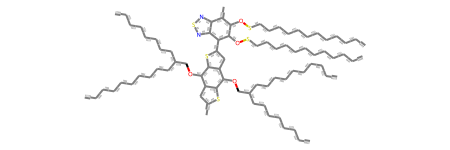

In [65]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pkg_resources

IMG_PATH = pkg_resources.resource_filename("ml_for_opvs", "ml_for_opvs/data/preprocess/replace_r.png")

patts = {
            "[R1]": "CC(CCCCCC)CCCCCCCC",
            "[R2]": "CCCCCCCC",
            "[R3]": "[Si](CCC)(CCC)(CCC)",
            "[R4]": "CC(CC)CCCC",
            "[R5]": "SCCCCCCCCCCCC",
            "[R6]": "CC(CCCCCCCC)CCCCCCCCCC",
            "[R7]": "SCC(CCCCCC)CCCC",
            "[R8]": "[Si](CC)(CC)(CC)",
            "[R9]": "[Si](C(C)C)(C(C)C)C(C)C",
            "[R10]": "[Si](CCCC)(CCCC)(CCCC)",
            "[R11]": "[Si](C)(C)CCCCCCCC",
            "[R12]": "SCCCCC=C",
            "[R13]": "SCC4CCCCC4",
            "[R14]": "CCCCCC",
            "[R15]": "CCCCCCCCCC",
            "[R18]": "CCCCC",
            "[R19]": "CCCCCCCCCCCCCCCC",
            "[R20]": "CCCCCCCCCCC",
            "[R21]": "C(CCCCCCCCC)CCCCCCC",
            "[R23]": "CC(CCCCCCCCCCCC)CCCCCCCCCC",
            "[R24]": "COCCOC",
            "[R25]": "CC(CCCCCCCCCCC)CCCCCCCCC",
            "[R26]": "CCC",
            "[R27]": "CCCC",
            "[R28]": "CCC(CC)CCCC",
            "[R29]": "CCCC(CC)CCCC",
        }

# New R group substitution pattern
new_patts = {}
atomic_num = 21
for k, v in patts.items():
    if atomic_num == 31:
        atomic_num = 39
    elif atomic_num == 49:
        atomic_num = 57
    elif atomic_num == 81:
        atomic_num = 89
    mol = Chem.MolFromSmarts("[#{}]".format(atomic_num))
    smi = Chem.MolToSmiles(mol)
    new_patts[smi] = patts[k]
    atomic_num += 1

smi = "Cc1sc2c(O[R6])c3cc(c4c5nsnc5c(C)c(O[R5])c4O[R5])sc3c(O[R6])c2c1"
print(f"{smi=}")
replaced_smi = replace_r_with_arbitrary(smi)
print(f"{replaced_smi=}")

# Any R group in SMARTS turns into *
mol = Chem.MolFromSmarts(smi)
print("smi w/ R group")
print(f"{Chem.MolToSmiles(mol)=}")
print('---------')
print("smi w/ replaced transition metals or lanthanides")
replaced_mol = Chem.MolFromSmarts(replaced_smi)
print(f"{Chem.MolToSmiles(replaced_mol)=}")
# Sanitize SMARTS
replaced_mol.UpdatePropertyCache()
Chem.GetSymmSSSR(replaced_mol)
replaced_mol.GetRingInfo().NumRings()
print(f"{new_patts=}")
for r in new_patts:
    if r in replaced_smi:
        print(r)
        products = AllChem.ReplaceSubstructs(replaced_mol, Chem.MolFromSmarts(r), Chem.MolFromSmarts(new_patts[r]), replaceAll=True)
        replaced_mol = products[0]
        final = replaced_mol

print("REPLACED MOL")
final

# for r in patts:
#     if r in smi:
#         mol_patt = Chem.MolFromSmarts(patts[r])
#         r_smart = r.strip("[]")
#         rxn = AllChem.ReactionFromSmarts('[{}:1].[#63:2]>>[C:1]-[C:2]'.format(r_smart))
#         products = rxn.RunReactants([mol, mol_patt])
#         for product in products:
#             print(Chem.MolToSmiles(product[0]))

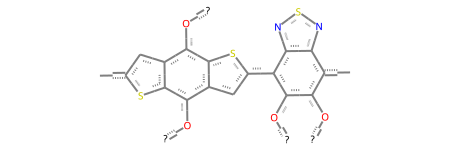

In [66]:
smi = "Cc1sc2c(O[R6])c3cc(c4c5nsnc5c(C)c(O[R5])c4O[R5])sc3c(O[R6])c2c1"
mol = Chem.MolFromSmarts(smi)
mol

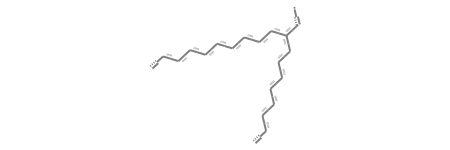

In [68]:
r6 = "[*]CC(CCCCCCCC)CCCCCCCCCC"
mol = Chem.MolFromSmarts(r6)
mol

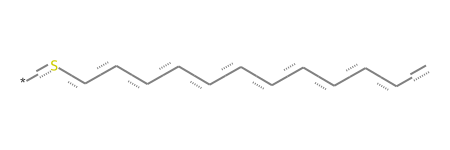

In [69]:
r5 = "[*]SCCCCCCCCCCCC"
mol = Chem.MolFromSmarts(r5)
mol